# Tarea computacional 2

1.)Escriba un programa pequeño programa el cual lea y guarde el número de protones (Z), el número de neutrone (N) y las energías de ligadura (B.E). Realice un gráfico de todas las energías de separación de neutrones para las cadenas de isótopos de oxígeno (O), Calcio (Ca), Niquel (Ni), Estaño (Sn) y Plomo (Pb). Ustedes deben de graficar

$S_n = BE(N, Z) − BE(N − 1, Z)$,

comente los resultados obtenidos.

In [1]:
#importacion de las librerias a usar
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import optimize

In [2]:
#Por comodidad se pasaron los datos a una hoja de excel
datos = pd.read_excel("mybinding.xlsx",header=None,names=["Z","A","B.E(MEV)","N"])

In [3]:
datos #Observamos como se encuentran los datos de la hoja

,Z,A,B.E(MEV),N
0,1,2,2.2246,1
1,1,3,8.4818,2
2,1,4,6.8818,3
3,1,5,6.6818,4
4,1,6,5.7698,5
...,...,...,...,...
2370,106,260,1909.0698,154
2371,106,261,1915.6782,155
2372,108,264,1926.7750,156
2373,108,265,1933.2383,157


In [4]:
#Se convierten los datos en arreglos de numpy y se separan por columnas
a=pd.DataFrame(datos).to_numpy()
Z=a[:,0]
A=a[:,1]
BE=a[:,2]
N=a[:,3]

El oxigeno suele hallar como $_{8}^{10}O_{2}$ entonces los isotopos a los que se les debe hallar la energía de separación son los que tengan $N\neq2$

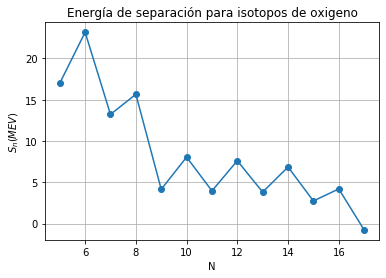

In [5]:
#Para todos los casos se hará lo mismo y solo variaremos lo que es N y Z
O=np.where(Z == 8) #Se hallan los valores del arreglo Z correspondientes al oxigeno 
NO=N[O]#Se crea un arreglo con los neutrones correspondientes a las posiciones halladas para el oxigeno
BEO=BE[O]#Igualmente al caso anterior se hace igual pero para la energía de ligadura 
NIO=np.delete(NO,0)#Se borra el primer elemento de los neutrones de isotopos de oxigeno
SNO=np.ones(len(NIO))#Se crea una lista de para los elementos de energía de separación
for i in range(len(SNO)):
    SNO[i]=BEO[i+1]-BEO[i] #Se aplica la formula para obtener la energía de separación en los diferentes isotopos del oxigeno
    
#Realización de la gráfica de numero de neutrones contra energía de separación    
plt.plot(NIO,SNO,"-o")
plt.title("Energía de separación para isotopos de oxigeno")
plt.xlabel("N")
plt.ylabel("$S_n (MEV)$")
plt.grid()
plt.show()

El calcio suele hallar como $_{20}Ca$.

El procedimiento es similar al anterior y también al igual que en los siguientes y por la ambigüedad del nombramiento de los isotopos(solo en el hidrógeno se distinguen por un nombre) se va a tomar en cada gráfica la separación sin tomar el caso de separar un neutron del isotopo de menor numero de neutrones.

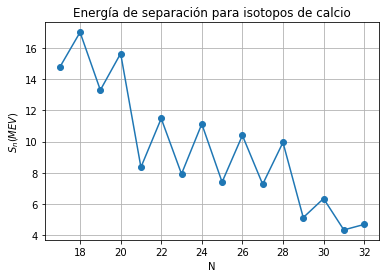

In [6]:
Ca=np.where(Z == 20)
NCa=N[Ca]
BECa=BE[Ca]
NICa=np.delete(NCa,0)
SNCa=np.ones(len(NICa))
for i in range(len(SNCa)):
    SNCa[i]=BECa[i+1]-BECa[i]
    
plt.plot(NICa,SNCa,"-o")
plt.title("Energía de separación para isotopos de calcio")
plt.xlabel("N")
plt.ylabel("$S_n (MEV)$")
plt.grid()
plt.show()

$_{28}NI$

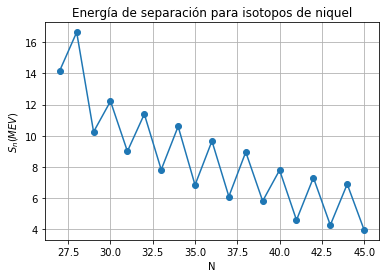

In [7]:
Ni=np.where(Z == 28)
NNi=N[Ni]
BENi=BE[Ni]
NINi=np.delete(NNi,0)
SNNi=np.ones(len(NINi))
for i in range(len(SNNi)):
    SNNi[i]=BENi[i+1]-BENi[i]
    
plt.plot(NINi,SNNi,"-o")
plt.title("Energía de separación para isotopos de niquel")
plt.xlabel("N")
plt.ylabel("$S_n (MEV)$")
plt.grid()
plt.show()

$_{50}Sn$

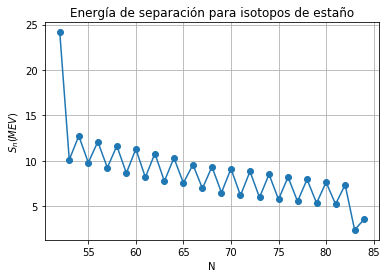

In [8]:
Sn=np.where(Z == 50)
NSn=N[Sn]
BESn=BE[Sn]
NISn=np.delete(NSn,0)
SNSn=np.ones(len(NISn))
for i in range(len(SNSn)):
    SNSn[i]=BESn[i+1]-BESn[i]
    
plt.plot(NISn,SNSn,"-o")
plt.title("Energía de separación para isotopos de estaño")
plt.xlabel("N")
plt.ylabel("$S_n (MEV)$")
plt.grid()
plt.show()

$_{82}Pb$

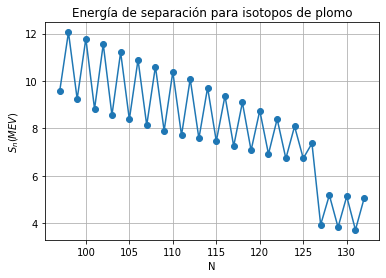

In [9]:
Pb=np.where(Z == 82)
NPb=N[Pb]
BEPb=BE[Pb]
NIPb=np.delete(NPb,0)
SNPb=np.ones(len(NIPb))
for i in range(len(SNPb)):
    SNPb[i]=BEPb[i+1]-BEPb[i]
    
plt.plot(NIPb,SNPb,"-o")
plt.title("Energía de separación para isotopos de plomo")
plt.xlabel("N")
plt.ylabel("$S_n (MEV)$")
plt.grid()
plt.show()

En los cinco caso vemos un comportamiento similar en todas las gráficas, el principal a notar es esa forma decreciente combinada al diente de sierra, en todas se nota mínimo un punto donde se decrece en una magnitud mayor a la vista antes o luego de dicho punto, también vemos que en todas las gráficas entre dos N impares hay un valor $S_n$ el cual es mayor que los anteriores, es decir los máximos relativos se hallan para valores pares de N y el menor valor de N nos dará el mayor valor de $S_n$.

En el capitulo 7 de "BASIC IDEAS AND CONCEPTS IN NUCLEAR PHYSICS AN INTRODUCTORY APPROACH THIRD EDITION" de "K Heyde" se discute el mismo comportamiento y bajo una gráfica similar para un isotopos de $_{58}Ce$, en principio el punto de mayor pendiente (observada a vista, para poder asegurarlo se tendría que calcular) es debida a la paridad, aunque podamos asegurar eso más adelante discutiré como sobre ese efecto en todos los puntos.

2.) En las mismas figuras, incluya los resultados (gráficas) del modelo de gota líquida, i.e:

$BE(N,Z) = \alpha_1 A - \alpha_2 A^{\frac{2}{3}} -\alpha_3 \frac{Z^2}{A^{\frac{1}{3}}} - \alpha_4 \frac{(N-Z)^2}{A}$

con $\alpha_1 = 15.48 MeV$, $\alpha_2 = 17.23 MeV$, $\alpha_3 = 0.697 MeV$ y $\alpha_4 = 22.6 MeV$. En la fórmula $Z(Z − 1) ≅ Z2$ (distribución contínua, ver Prusin) y se desprecia el término de interacción por pares $(δ = 0)$. Haga una gráfica similar a la figura myfig.pdf encontrada en el Classroom donde ud debe colocar varios parámetros $\alpha_i = 0$. Comente sus resultados.

In [10]:
a=[15.48,17.23,0.697,22.6]#Se crea un arreglo que contiene a todas las constantes necesarias para el problema planteado
"""
Se crean dos funciones, una la cual nos permite calcular la energía de ligadura y otra que usando
la anterior nos permite calcular la energía de separación de un neutron, en ambas es necesario conocer 
los valores de las constantes y dar el valor numero de neutrones y protones.
"""
def BE(a1,a2,a3,a4,N,Z):
    return a1*(Z+N) - a2*(Z+N)**(2/3) - a3*((Z**2)/(Z+N)**(1/3)) - a4*((N-Z)**2/(Z+N))
def Sn(a1,a2,a3,a4,N,Z):
    return BE(a1,a2,a3,a4,N,Z) - BE(a1,a2,a3,a4,N-1,Z)

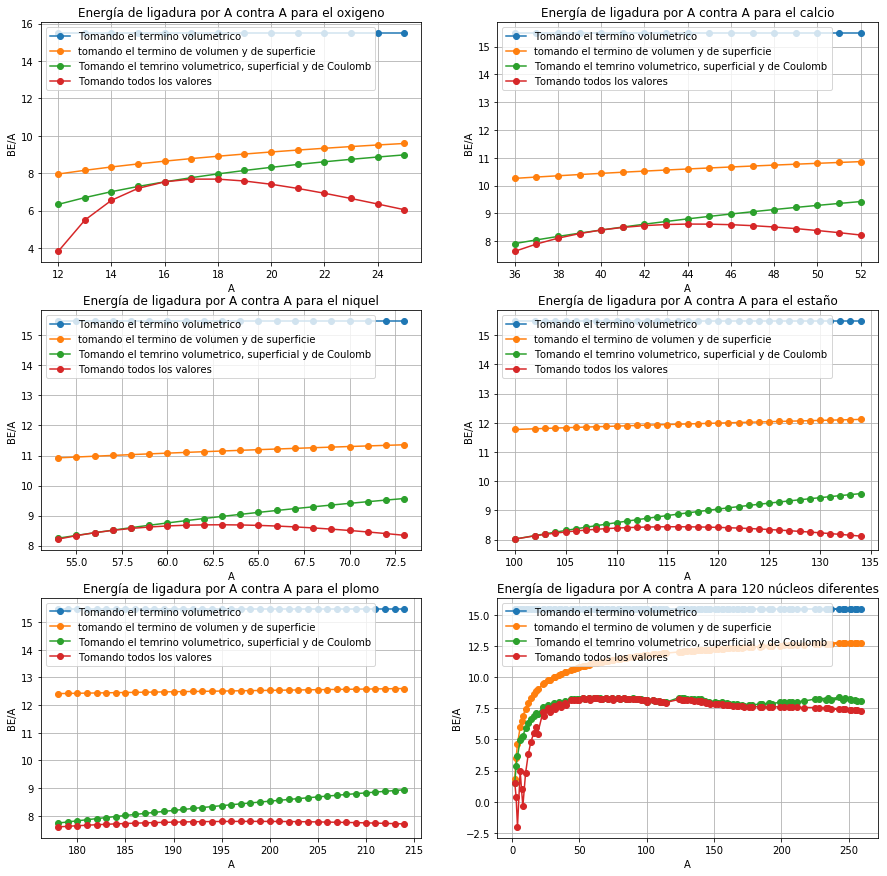

In [11]:
z=np.ones(105)
n=np.ones(105)

for i in range(len(z)):# se cran los arreglos que contendrán neutrones y protones de diferentes núcleos
    z[i]=i+1
    n[i]=N[np.where(Z==i+1)][0]

#se crean las gráficas donde se comparan BE/A con A iniciado con el termino de volumen y añadiendo los demás términos de a uno

f = plt.figure(figsize=(15,15))

ax1 = f.add_subplot(321)
plt.grid()
ax2 = f.add_subplot(322)
plt.grid()
ax3 = f.add_subplot(323)
plt.grid()
ax4 = f.add_subplot(324)
plt.grid()
ax5 = f.add_subplot(325)
plt.grid()
ax6 = f.add_subplot(326)
plt.grid()

ax1.set_title("Energía de ligadura por A contra A para el oxigeno")
ax1.set_xlabel("A")
ax1.set_ylabel("BE/A")
ax1.plot(NO+8,BE(a[0],0,0,0,NO,8)/(NO+8),"-o",label="Tomando el termino volumetrico")
ax1.plot(NO+8,BE(a[0],a[1],0,0,NO,8)/(NO+8),"-o",label="tomando el termino de volumen y de superficie")
ax1.plot(NO+8,BE(a[0],a[1],a[2],0,NO,8)/(NO+8),"-o",label="Tomando el temrino volumetrico, superficial y de Coulomb")
ax1.plot(NO+8,BE(a[0],a[1],a[2],a[3],NO,8)/(NO+8),"-o",label="Tomando todos los valores")
ax1.legend(loc=2)

ax2.set_title("Energía de ligadura por A contra A para el calcio")
ax2.set_xlabel("A")
ax2.set_ylabel("BE/A")
ax2.plot(NCa+20,BE(a[0],0,0,0,NCa,20)/(NCa+20),"-o",label="Tomando el termino volumetrico")
ax2.plot(NCa+20,BE(a[0],a[1],0,0,NCa,20)/(NCa+20),"-o",label="tomando el termino de volumen y de superficie")
ax2.plot(NCa+20,BE(a[0],a[1],a[2],0,NCa,20)/(NCa+20),"-o",label="Tomando el temrino volumetrico, superficial y de Coulomb")
ax2.plot(NCa+20,BE(a[0],a[1],a[2],a[3],NCa,20)/(NCa+20),"-o",label="Tomando todos los valores")
ax2.legend(loc=2)

ax3.set_title("Energía de ligadura por A contra A para el niquel")
ax3.set_xlabel("A")
ax3.set_ylabel("BE/A")
ax3.plot(NNi+28,BE(a[0],0,0,0,NNi,28)/(NNi+28),"-o",label="Tomando el termino volumetrico")
ax3.plot(NNi+28,BE(a[0],a[1],0,0,NNi,28)/(NNi+28),"-o",label="tomando el termino de volumen y de superficie")
ax3.plot(NNi+28,BE(a[0],a[1],a[2],0,NNi,28)/(NNi+28),"-o",label="Tomando el temrino volumetrico, superficial y de Coulomb")
ax3.plot(NNi+28,BE(a[0],a[1],a[2],a[3],NNi,28)/(NNi+28),"-o",label="Tomando todos los valores")
ax3.legend(loc=2)

ax4.set_title("Energía de ligadura por A contra A para el estaño")
ax4.set_xlabel("A")
ax4.set_ylabel("BE/A")
ax4.plot(NSn+50,BE(a[0],0,0,0,NSn,50)/(NSn+50),"-o",label="Tomando el termino volumetrico")
ax4.plot(NSn+50,BE(a[0],a[1],0,0,NSn,50)/(NSn+50),"-o",label="tomando el termino de volumen y de superficie")
ax4.plot(NSn+50,BE(a[0],a[1],a[2],0,NSn,50)/(NSn+50),"-o",label="Tomando el temrino volumetrico, superficial y de Coulomb")
ax4.plot(NSn+50,BE(a[0],a[1],a[2],a[3],NSn,50)/(NSn+50),"-o",label="Tomando todos los valores")
ax4.legend(loc=2)

ax5.set_title("Energía de ligadura por A contra A para el plomo")
ax5.set_xlabel("A")
ax5.set_ylabel("BE/A")
ax5.plot(NPb+82,BE(a[0],0,0,0,NPb,82)/(NPb+82),"-o",label="Tomando el termino volumetrico")
ax5.plot(NPb+82,BE(a[0],a[1],0,0,NPb,82)/(NPb+82),"-o",label="tomando el termino de volumen y de superficie")
ax5.plot(NPb+82,BE(a[0],a[1],a[2],0,NPb,82)/(NPb+82),"-o",label="Tomando el temrino volumetrico, superficial y de Coulomb")
ax5.plot(NPb+82,BE(a[0],a[1],a[2],a[3],NPb,82)/(NPb+82),"-o",label="Tomando todos los valores")
ax5.legend(loc=2)

ax6.set_title("Energía de ligadura por A contra A para 120 núcleos diferentes")
ax6.set_xlabel("A")
ax6.set_ylabel("BE/A")
ax6.plot(n+z,BE(a[0],0,0,0,n,z)/(n+z),"-o",label="Tomando el termino volumetrico")
ax6.plot(n+z,BE(a[0],a[1],0,0,n,z)/(n+z),"-o",label="tomando el termino de volumen y de superficie")
ax6.plot(n+z,BE(a[0],a[1],a[2],0,n,z)/(n+z),"-o",label="Tomando el temrino volumetrico, superficial y de Coulomb")
ax6.plot(n+z,BE(a[0],a[1],a[2],a[3],n,z)/(n+z),"-o",label="Tomando todos los valores")
ax6.legend(loc=2)

plt.show()

La primer diferencia observada entre las gráficas de los isotopos y la obtenida con diferentes núcleos el comportamiento en isotopos se encuentra en que al tratar isotopos las curvas obtenidas parecen curvas conocidas como rectas o cónicas mientras que la obtenida por con los diversos núcleos dan desde que se añade el efecto debido al termino de superficie se ve un comportamiento más raro comparado a las anteriores pero similar al buscado del cual difiere en unos puntos que parece una discontinuidad que no se observa en la gráfica esperada, esta puede deberse a las aproximaciones hechas por la maquina.

Ahora se mostrar la relación entre $S_n$ obtenida de los datos contra el $S_n$ obtenida de la formula.

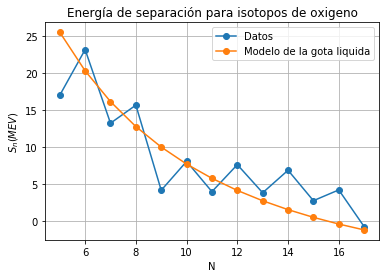

In [12]:
SnOg= Sn(a[0],a[1],a[2],a[3],NIO,8)
plt.plot(NIO,SNO,"-o",label="Datos")
plt.plot(NIO,SnOg,"-o",label="Modelo de la gota liquida")
plt.title("Energía de separación para isotopos de oxigeno")
plt.xlabel("N")
plt.ylabel("$S_n (MEV)$")
plt.legend()
plt.grid()
plt.show()

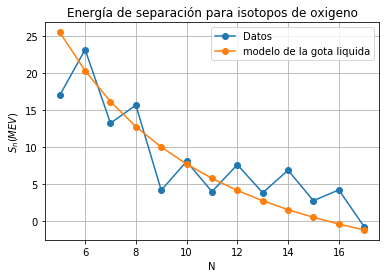

In [13]:
SnCa= Sn(a[0],a[1],a[2],a[3],NICa,20)
plt.plot(NIO,SNO,"-o",label="Datos")
plt.plot(NIO,SnOg,"-o",label="modelo de la gota liquida")
plt.title("Energía de separación para isotopos de oxigeno")
plt.xlabel("N")
plt.ylabel("$S_n (MEV)$")
plt.legend()
plt.grid()
plt.show()

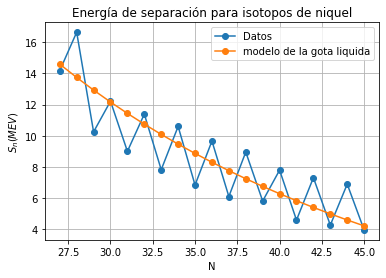

In [14]:
SnNi = Sn(a[0],a[1],a[2],a[3],NINi,28) 
plt.plot(NINi,SNNi,"-o",label="Datos")
plt.plot(NINi,SnNi,"-o",label="modelo de la gota liquida")
plt.title("Energía de separación para isotopos de niquel")
plt.xlabel("N")
plt.ylabel("$S_n (MEV)$")
plt.legend()
plt.grid()
plt.show()

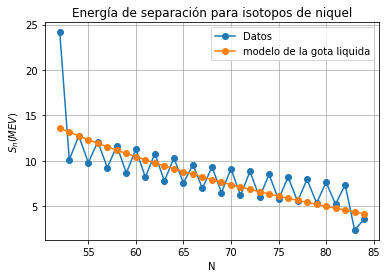

In [15]:
SnSn = Sn(a[0],a[1],a[2],a[3],NISn,50)
plt.plot(NISn,SNSn,"-o",label="Datos")
plt.plot(NISn,SnSn,"-o",label="modelo de la gota liquida")
plt.title("Energía de separación para isotopos de niquel")
plt.xlabel("N")
plt.ylabel("$S_n (MEV)$")
plt.legend()
plt.grid()
plt.show()

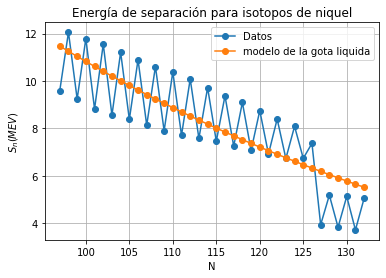

In [16]:
SnPb = Sn(a[0],a[1],a[2],a[3],NIPb,82)
plt.plot(NIPb,SNPb,"-o",label="Datos")
plt.plot(NIPb,SnPb,"-o",label="modelo de la gota liquida")
plt.title("Energía de separación para isotopos de niquel")
plt.xlabel("N")
plt.ylabel("$S_n (MEV)$")
plt.legend()
plt.grid()
plt.show()

Lo primero que observamos es que el modelo y los datos tienen la misma tendencia de ir disminuyendo la energía de separación cuando se aumentan los neutrones, por otro lado sin contar algunos puntos que coinciden o los tantos cercanos observados vemos comportamientos totalmente diferentes pero del punto anterior eso no es un problema ya que se habia concluido que el comportamiento tipo diente de sierra es debido al termino de paridad que se ha ignorado.

3.) Investigue usando la bibliografía del curso que es "neutron drip lines" y "proton drip lines". Usando el modelo de la gota líquida descrita anteriormente encontrar las "neutron drip lines" para valores de Z hasta 120. Analizar los isótopos de Fluor (F) realizando una comparación entre los valores experimentales (donde sea posible encontrarlos) y las predicciones del modelo de gota líquida de sus energías nucleares de ligadura.

Tomado del texto anteriormente mencionada en el primer punto exactamente del mismo capitulo llaman las neutron yivament proton drip lines a las curvas obtenidas de la condición $S_n=0$ y $S_p=0$ respecte donde $S_p$ es la energía de separación de un proton.

In [17]:
def BE1(N,Z):
    return 15.48*(Z+N) - 17.23*(Z+N)**(2/3) - 0.697*((Z**2)/(Z+N)**(1/3)) - 22.6*((N-Z)**2/(Z+N))
def Sn1(N,Z):
    return BE1(N,Z) - BE1(N-1,Z)


z=np.ones(120)
ndl=np.ones(120)
for i in range(len(z)):
    z[i]=i+1
    
    ndl[i]=optimize.newton(Sn1, 1+2*i, args=(z[i],)) #Se usa una función que halla ceros de funciones dada una semilla

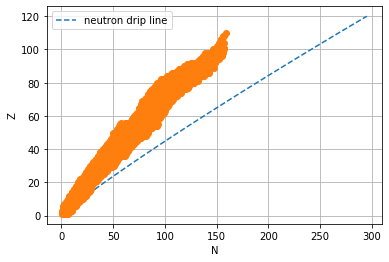

In [18]:
plt.plot(ndl,z,"--",label="neutron drip line")
plt.plot(N,Z,"o")
plt.xlabel("N")
plt.ylabel("Z")
plt.legend()
plt.grid()
plt.show()

La forma de la función empleada para hallar los ceros y de algunos plots hechos la semilla no es la mejor, por otro lado el comportamiento y posición tiende al esperado pero no exactamente ya que no se aproximaron y la linea gratificada toma valores imposibles fisicamente como $N\neq entero$.

La creación de la anterior función para obtener la linea no es necesaria pero por problemas en el código y a función anterior facilito la obtención de ella.

Sabemos que $BE=(Z(M(^1H) - 1) + N(M_n - 1))c^2 - \Delta$

In [19]:
MH=1.0078250 #u
Mn=1.0086649 #u
C2=931.50 #MEV/u

def BEe(Z,N,delta): #energía de ligadura en funcion del defecto de masa
    return (Z*(MH-1) + N*(Mn-1))*C2 - delta

In [20]:
#Valor del defecto de masa para F-17 hallado en el Krane
abs(BEe(9,8,1.952)-BE(a[0],a[1],a[2],a[3],8,9))/BEe(9,8,1.952)

0.017640382013488873

In [21]:
"""
New approach to nuclear binding energy in integrated nuclear model
Nader Ghahramany, Shirvan Gharaati and Mohammad Ghanaatian
se halla un valor de BE/A para el F-19
"""

abs(7.94899*19-BE(a[0],a[1],a[2],a[3],10,9))/(7.94899*19)

0.012857129951192982

In [22]:
"""
Pairing Effect on the Binding Energy Curve of N = Z Atomic Nuclei
Bernard Schaeffer 
se halla un valor de BE/A para el F-18 
"""
abs(7.63 * 18 -BE(a[0],a[1],a[2],a[3],9,9))/(7.63 * 18)

0.010317928310946528

In [23]:
#De los valores del defecto de masa hallados en el documento del classroom
d=[31.96,16.81,10.680,1.951,0.873,-1.487,-0.017,-0.047,2.79,3.3,7.56,11.36,18.67,24.6,33.1,40,48.4,55.9]# desfectos de masa

for i in range (5,23):
    print(abs(BEe(9,i,d[i-5])-BE(a[0],a[1],a[2],a[3],i,9))/BEe(9,i,d[i-5])," ", i)

0.08941319539108543   5
0.06446831357964992   6
0.010761261800255724   7
0.017648043486614043   8
0.010096723085907193   9
0.008711392308478482   10
0.01895401412833132   11
0.007863110375056954   12
0.005702687825896238   13
0.017263296111885023   14
0.024694873909806854   15
0.0398129867200097   16
0.04110371840484292   17
0.05375769123228772   18
0.0570266663708223   19
0.07173676738344856   20
0.08196437898681112   21
0.0993188150810159   22


Vemos como en el punto anterior que entre el modelo empleado los datos experimentales hay una cercanía entre los puntos pero no es algo que concuerde demasiado bien al olvidar el termino del paridad pero vemos que el error causado para el caso del flúor a lo sumo alcanza el 10%